In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
from sklearn import metrics as sk_metrics
import pickle
import time
import math

C:\Users\why\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
np.set_printoptions(precision=4, threshold=np.inf)

In [3]:
file_path = './Data/days_after_mainshock_360/'

In [4]:
def get_filename(filepath = file_path):
    file_list = []
    for filename in os.listdir(filepath):
        file_list.append(filename)
    return file_list
file_list = get_filename()

In [5]:
print(len(file_list))

175


In [6]:
def get_sample(file_list, col_list, filepath=file_path):
    raw_data = pd.DataFrame(columns=col_list)    
    for file in file_list:
        df = pd.read_csv(filepath+file, header=0)
        df = df[col_list]
        axis = np.where(np.isnan(df))
        if len(axis[0]) != 0:
            print("%s is wrong" % file)
            continue
            
        unique = df['aftershock_mag'].unique()
        if(len(unique)==1):
            continue
        raw_data = raw_data.append(df)
    return raw_data

In [7]:
cnt = len(file_list)
Index = [i for i in range(cnt)]
random.seed(21)
random.shuffle(Index)
print(Index)

[82, 48, 61, 69, 92, 164, 145, 7, 156, 117, 80, 144, 146, 123, 78, 6, 53, 103, 36, 95, 150, 1, 50, 81, 172, 88, 126, 51, 27, 143, 12, 45, 101, 136, 2, 132, 16, 170, 157, 115, 30, 151, 83, 90, 35, 56, 168, 58, 153, 24, 32, 79, 67, 89, 169, 65, 152, 133, 158, 137, 100, 33, 106, 4, 91, 166, 54, 140, 163, 85, 13, 139, 141, 75, 174, 44, 21, 23, 14, 110, 118, 77, 73, 28, 66, 76, 70, 148, 119, 161, 63, 20, 11, 160, 34, 98, 62, 40, 108, 64, 57, 165, 155, 52, 68, 18, 43, 125, 49, 105, 112, 128, 71, 15, 130, 93, 74, 167, 97, 96, 147, 114, 134, 86, 26, 25, 99, 19, 171, 120, 9, 47, 38, 124, 102, 87, 41, 116, 142, 31, 22, 39, 5, 159, 29, 127, 138, 84, 8, 113, 104, 111, 10, 154, 59, 37, 17, 109, 149, 94, 3, 0, 60, 135, 129, 46, 131, 121, 55, 122, 72, 162, 173, 107, 42]


In [8]:
# choose different physics 
# feat_columns = [["aftershock_mag", "coulomb"]]
# feat_columns = [["aftershock_mag", 'maxshear']]
feat_columns = [["aftershock_mag", "von"]]

In [9]:
add_abs = False

20011114-M7.8.csv is wrong


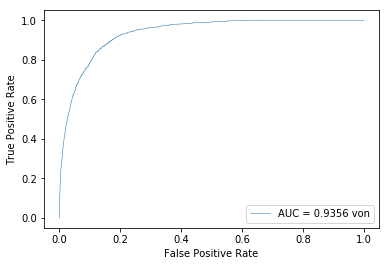

20151207-M7.2.csv is wrong


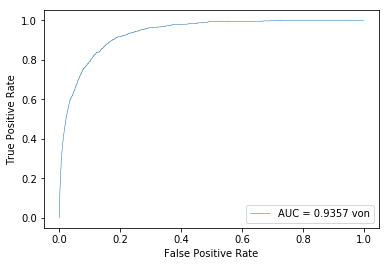

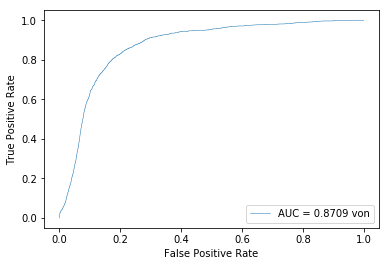

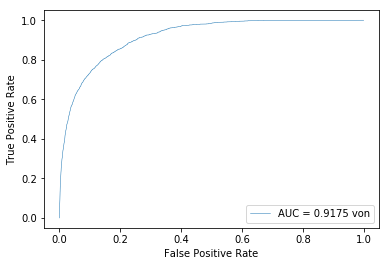

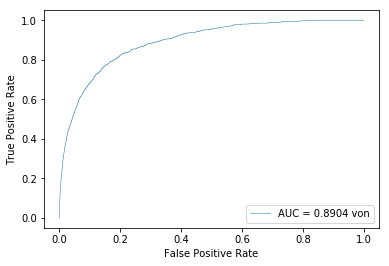

In [11]:
def main():
    fold_cnt = 5
    AUC_list = []
    
    Test_label_list,Test_predictProb_list=[],[]
    for fold in range(fold_cnt):
        AUC = []
        for idx, columns in enumerate(feat_columns):
            group_cnt = len(file_list) // fold_cnt
            
            eval_Index = Index[fold*group_cnt:(fold+1)*group_cnt]
            eval_file = [file_list[idx] for idx in eval_Index]
            
            eval_data_list = []
            eval_data = get_sample(eval_file, columns)
            feat_name = columns[-1]
            feat_val = eval_data[feat_name].values
            if add_abs:
                feat_val = abs(feat_val)
                feat_name = 'abs('+feat_name+')'
            
            label_val = eval_data['aftershock_mag'].values
            label_val = (np.array(label_val)>0).astype(int).tolist()
            
            # draw the ROC 
            fpr, tpr, threshold = sk_metrics.roc_curve(label_val, feat_val)
            roc_auc = sk_metrics.roc_auc_score(label_val, feat_val)
            plt.plot(fpr, tpr,lw=0.5, label=('AUC = %0.4f ' %  roc_auc) + feat_name)
            plt.legend(loc = 'lower right')
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            
            AUC.append(roc_auc)
            Test_label_list.append(label_val)
            Test_predictProb_list.append(feat_val)
        plt.show()
            
        AUC_list.append(AUC)
    return Test_label_list,Test_predictProb_list, np.array(AUC_list)
Test_label_list,Test_predictProb_list,AUC_array= main()

In [12]:
print(np.mean(AUC_array)) 

0.9100186548529079
